# Lab 6: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 6.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will for the first time use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.tools.plotting import scatter_matrix
import pandas as pd
%matplotlib inline


Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

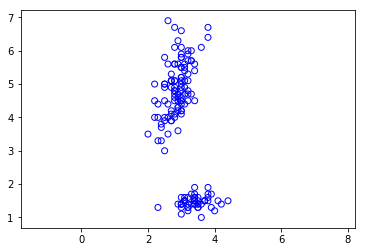

In [35]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

In [4]:
d1 = pd.DataFrame(d)
d1.head()
#d2 = pd.DataFrame(y)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [6]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

In [25]:
pd.DataFrame(Z)
pd.DataFrame(dnew)


,0,1
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
5,3.9,1.7
6,3.4,1.4
7,3.4,1.5
8,2.9,1.4
9,3.1,1.5


Let us now plot the dendrogram. 

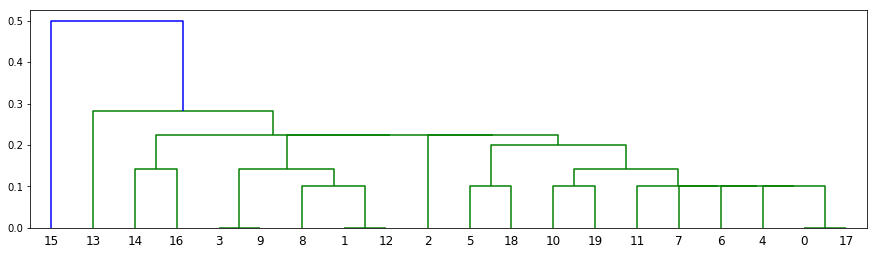

In [5]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

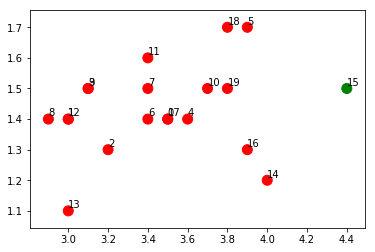

In [17]:
plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result. the dendogram and clusters would be different
- Use a metric other than 'Eucliedean'. Discuss the result. Slightly different


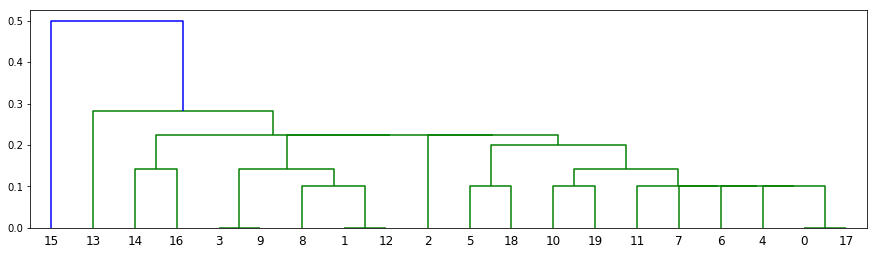

In [44]:
A1=range(0,20)
dnew1 = d[A1,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z1 = hierarchy.linkage(dnew1,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl1 = hierarchy.fcluster(Z1, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z1);


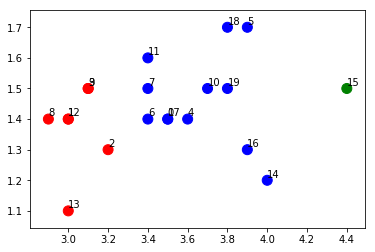

In [63]:
plt.figure()
colors=['red','blue','green']
plt.scatter(dnew1[A1,0],dnew1[A1,1],c=cl1, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A1:
    plt.text(dnew1[i,0],dnew1[i,1]+0.01,s=str(i),size=10)

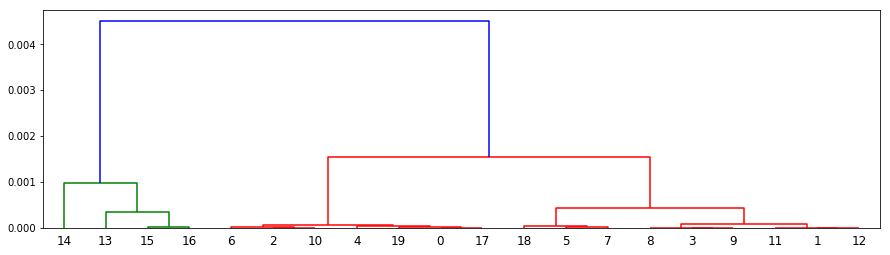

In [52]:
#Average
A1=range(0,20)
dnew1 = d[A1,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z1 = hierarchy.linkage(dnew1,method = 'average', metric = 'cosine')
# Picks 2 clusters
cl1 = hierarchy.fcluster(Z1, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z1);


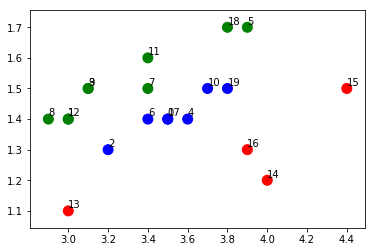

In [53]:
plt.figure()
colors=['red','blue','green']
plt.scatter(dnew1[A1,0],dnew1[A1,1],c=cl1, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A1:
    plt.text(dnew1[i,0],dnew1[i,1]+0.01,s=str(i),size=10)

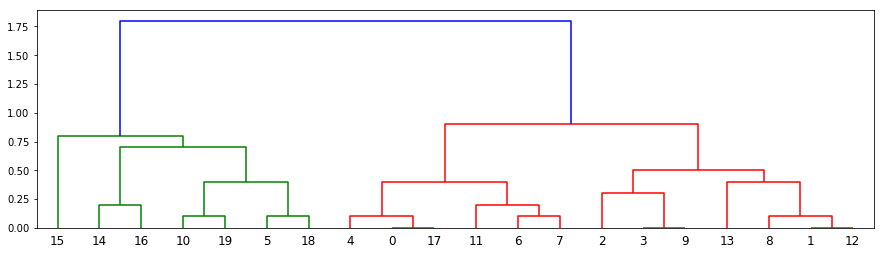

In [66]:
#Average
A1=range(0,20)
dnew1 = d[A1,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z1 = hierarchy.linkage(dnew1,method = 'complete', metric = 'cityblock')
# Picks 2 clusters
cl1 = hierarchy.fcluster(Z1, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z1);


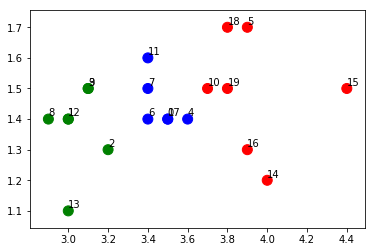

In [67]:
plt.figure()
colors=['red','blue','green']
plt.scatter(dnew1[A1,0],dnew1[A1,1],c=cl1, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A1:
    plt.text(dnew1[i,0],dnew1[i,1]+0.01,s=str(i),size=10)

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters. I'm guessing three, since there are 3 types of flowers in the dataset? Just kidding, its 3 because when there are more than four clusters, those fourth or fifth cluster are usually not well defined as the other three

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

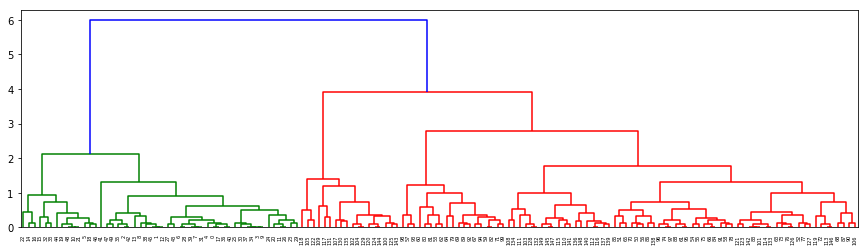

In [113]:
#Average

dnew1 = d[:,1:3]

Z1 = hierarchy.linkage(dnew1,method = 'complete', metric = 'euclidean')
# Picks 2 clusters
cl2 = hierarchy.fcluster(Z1, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z1);


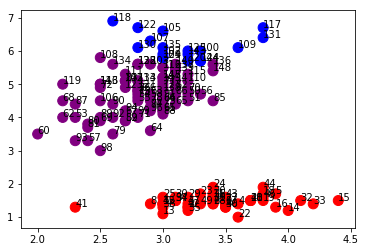

In [118]:
plt.figure()
colors=['red','blue','purple']
plt.scatter(dnew1[:,0],dnew1[:,1],c=cl2, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in range(0,len(dnew1)):
    plt.text(dnew1[i,0],dnew1[i,1]+0.01,s=str(i),size=10)

In [117]:
print crosstab(cl2, y, rownames=['cl'], colnames=['y'])

y    0   1   2
cl            
1   50   0   0
2    0   0  18
3    0  50  32


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job? It does a great job for the first one. The third cluster has a mixture of flower type 1 and 2, but the accuracy over all is still about 80%, which is pretty good

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters. I already did above with 3 clusters



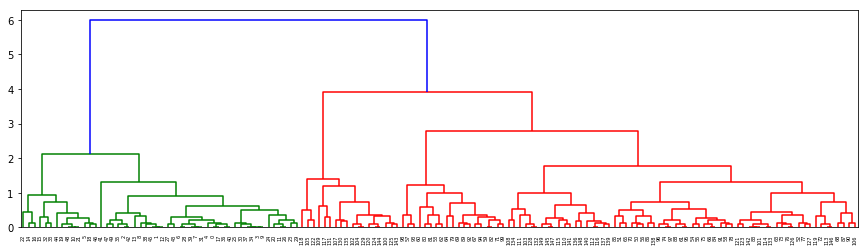

In [124]:

dnew4 = d[:,1:3]

Z4 = hierarchy.linkage(dnew4,method = 'complete', metric = 'euclidean')

cl4 = hierarchy.fcluster(Z4, 4, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z4);


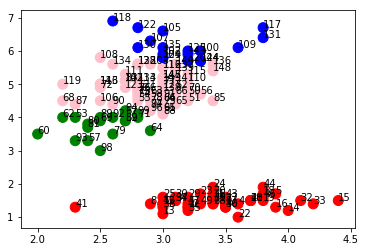

In [128]:
plt.figure()
colors=['red','blue','green','pink']
plt.scatter(dnew4[:,0],dnew4[:,1],c=cl4, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in range(0,len(dnew4)):
    plt.text(dnew1[i,0],dnew1[i,1]+0.01,s=str(i),size=10)

In [123]:
print crosstab(cl4, y, rownames=['cl'], colnames=['y'])
# Cluster 4 há values from both y=1 and y=2

y    0   1   2
cl            
1   50   0   0
2    0   0  18
3    0  19   0
4    0  31  32


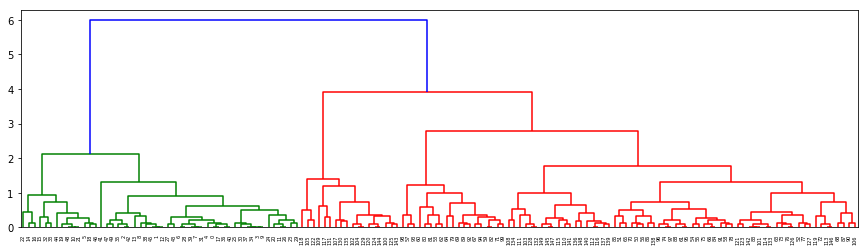

In [134]:

dnew5 = d[:,1:3]

Z5 = hierarchy.linkage(dnew5,method = 'complete', metric = 'euclidean')

cl5 = hierarchy.fcluster(Z5, 5, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z5);


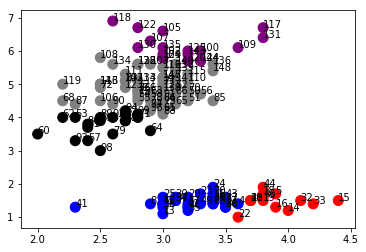

In [135]:
plt.figure()
colors=['red','blue','purple','black','grey']
plt.scatter(dnew5[:,0],dnew5[:,1],c=cl5, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in range(0,len(dnew5)):
    plt.text(dnew1[i,0],dnew1[i,1]+0.01,s=str(i),size=10)

In [136]:
print crosstab(cl5, y, rownames=['cl'], colnames=['y'])
# Cluster 5 has values from both y=1 and y=2

y    0   1   2
cl            
1   14   0   0
2   36   0   0
3    0   0  18
4    0  19   0
5    0  31  32


**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. You task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please jsutify why you selected the formula. Suppose we know already the number of clusters in the dataset, lets say the types of flowers like in the iris dataset. Then you can calculate the error using the formula number_of_errors/total_data_points 

**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

The best I got is the complete method with euclidean distance. The cross-tabulation shows that there is only 3% error

(150L, 4L) (4L,) (4L, 4L)
the first 10 singular values: [ 95.95066751  17.72295328   3.46929666   1.87891236]


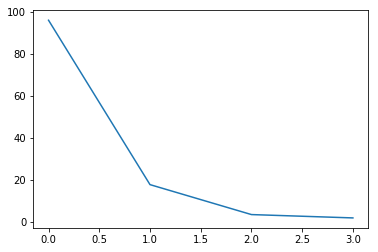

In [139]:
U1,s1,V1 = np.linalg.svd(d,full_matrices=0)
print U1.shape, s1.shape, V1.shape
print 'the first 10 singular values:', s1[0:10]

plt.plot(s1[:10]);
plt.show()

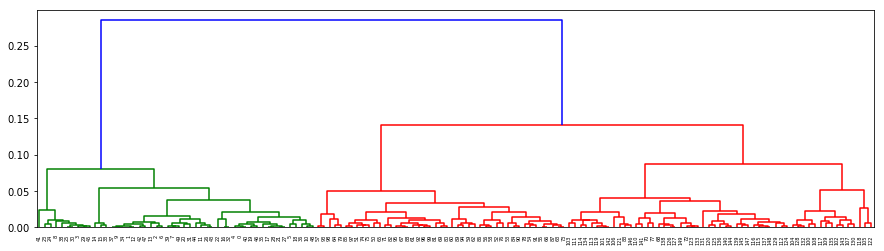

In [144]:

Unew = U1[:,0:2]

Z6 = hierarchy.linkage(Unew,method = 'complete', metric = 'euclidean')

cl6 = hierarchy.fcluster(Z6, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z6);


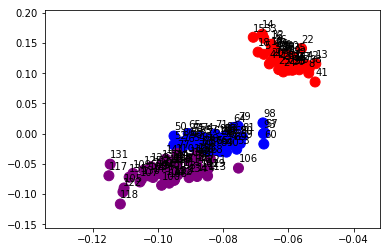

In [145]:
plt.figure()
colors=['red','blue','purple']
plt.scatter(Unew[:,0],Unew[:,1],c=cl6, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in range(0,len(Unew)):
    plt.text(Unew[i,0],Unew[i,1]+0.01,s=str(i),size=10)


In [146]:
print crosstab(cl6, y, rownames=['cl'], colnames=['y'])

y    0   1   2
cl            
1   50   0   0
2    0  45   0
3    0   5  50


## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

y    0   1   2
cl            
0   50   0   0
1    0   0  24
2    0  27   1
3    0   0  12
4    0  23  13


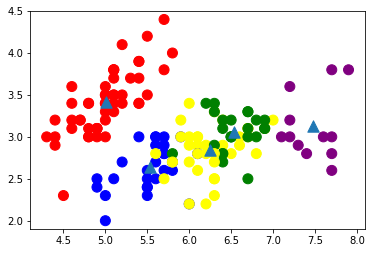

In [154]:
# the following command results in creating of 5 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])


**Question 7**. Discuss on the quality of outcome of k-means clustering. The crosstab shows a big degree error, which suggest that the number k we picked (5) would not be a good one

**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**. They look about the same

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results. The accuracy is good with very small error. Compared with the hierarchical clustering results, SVD k-means result is about the same

y    0   1   2
cl            
0    0  48  14
1   50   0   0
2    0   2  36


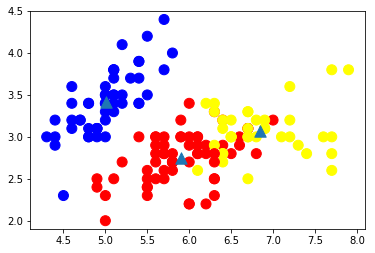

In [155]:
#Question 8:
# the following command results in creating of 5 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])


(150L, 4L) (4L,) (4L, 4L)
y    0   1   2
cl            
0   50   0   0
1    0   3  49
2    0  47   1


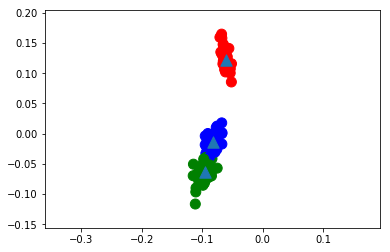

In [157]:
U1,s1,V1 = np.linalg.svd(d,full_matrices=0)
print U1.shape, s1.shape, V1.shape

Unew = U1[:,0:2]
#Question 8:
# the following command results in creating of 3 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(Unew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue']
plt.figure()
plt.scatter(Unew[:,0],Unew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])


## Lab 6.b Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data from **Lab 5**. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering. Can't be linearly seperated

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering? The cluster centers dont change because they are not linearly seperated
Speed: O(MNK)

**Question 1**:

In [158]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')


In [169]:
newsgroup1 = newsgroup.reshape(16242,1)
documents = np.hstack((documents,newsgroup1))

In [196]:
i = np.random.randint(0,documents.shape[0],100)
randomdoc = documents[i]
randomdoc


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 4],
       ..., 
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 1]])

**Question 2**

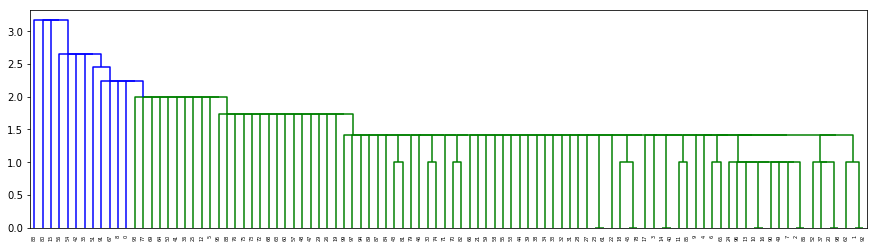

In [225]:

newdoc = randomdoc[:,0:100]

Zdoc = hierarchy.linkage(newdoc,method = 'single', metric = 'euclidean')

cldoc = hierarchy.fcluster(Zdoc, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Zdoc);


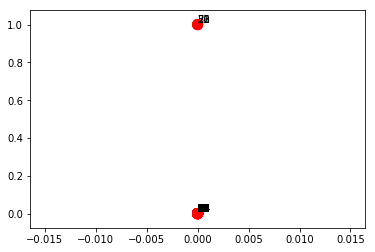

In [226]:
plt.figure()
colors=['red','blue','purple']
plt.scatter(newdoc[:,0],newdoc[:,1],c=cldoc, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in range(0,len(newdoc)):
    plt.text(newdoc[i,0],newdoc[i,1]+0.01,s=str(i),size=10)

In [223]:
print crosstab(cldoc, randomdoc[:,100:101].reshape(100,1).T[0], rownames=['cl'], colnames=['y'])


y    1   2   3   4
cl                
1   30  17  12  41


**Question 3**:

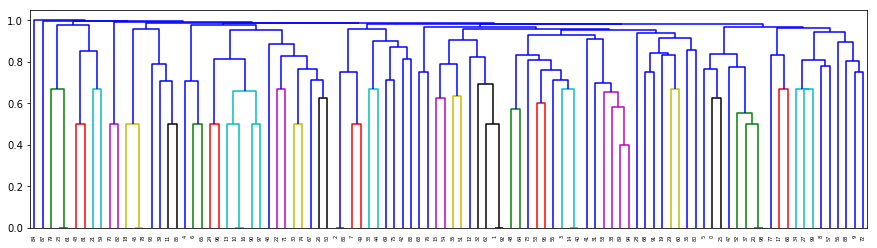

In [229]:

newdoc = randomdoc[:,0:100]

Zdoc = hierarchy.linkage(newdoc,method = 'average', metric = 'jaccard')

cldoc = hierarchy.fcluster(Zdoc, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Zdoc);


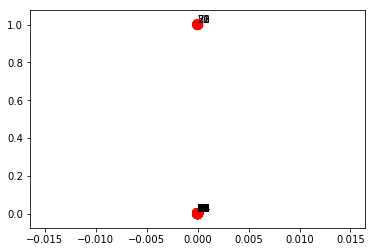

In [230]:
plt.figure()
colors=['red','blue','purple']
plt.scatter(newdoc[:,0],newdoc[:,1],c=cldoc, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in range(0,len(newdoc)):
    plt.text(newdoc[i,0],newdoc[i,1]+0.01,s=str(i),size=10)

In [231]:
print crosstab(cldoc, randomdoc[:,100:101].reshape(100,1).T[0], rownames=['cl'], colnames=['y'])


y    1   2   3   4
cl                
1   30  16  12  40
2    0   0   0   1
3    0   1   0   0


**Still cannot be linearly seperated. Let's try consine**

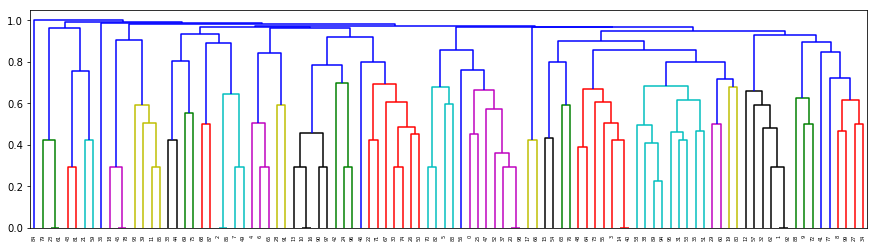

In [232]:

newdoc = randomdoc[:,0:100]

Zdoc = hierarchy.linkage(newdoc,method = 'average', metric = 'cosine')

cldoc = hierarchy.fcluster(Zdoc, 3, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Zdoc);


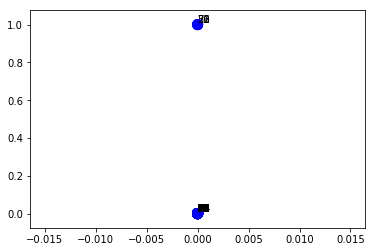

In [233]:
plt.figure()
colors=['red','blue','purple']
plt.scatter(newdoc[:,0],newdoc[:,1],c=cldoc, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in range(0,len(newdoc)):
    plt.text(newdoc[i,0],newdoc[i,1]+0.01,s=str(i),size=10)

In [234]:
print crosstab(cldoc, randomdoc[:,100:101].reshape(100,1).T[0], rownames=['cl'], colnames=['y'])
#Same thing happens, although the cluster move to a different label group

y    1   2   3   4
cl                
1    4   0   1   2
2   26  16  11  39
3    0   1   0   0


**Question 4**

y    1   2   3   4
cl                
0   24  16  10  33
1    1   0   0   5
2    5   1   2   3


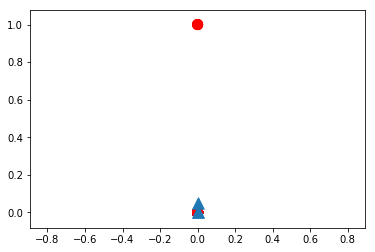

In [236]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(newdoc)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
colors=['red','green','blue']
plt.figure()
plt.scatter(newdoc[:,0],newdoc[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, randomdoc[:,100:101].reshape(100,1).T[0], rownames=['cl'], colnames=['y'])


**Question 5 **

In [248]:
x = 200
def itercluster(x):
    i = np.random.randint(0,documents.shape[0],x)
    randomdoc = documents[i]
    randomdoc

    newdoc = randomdoc[:,0:100]

    Zdoc = hierarchy.linkage(newdoc,method = 'average', metric = 'jaccard')

    cldoc = hierarchy.fcluster(Zdoc, 5, criterion='maxclust')
    plt.figure(figsize = (15,4))
    hierarchy.dendrogram(Zdoc);
    plt.figure()
    colors=['red','blue','purple']
    plt.scatter(newdoc[:,0],newdoc[:,1],c=cldoc, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
    for i in range(0,len(newdoc)):
        plt.text(newdoc[i,0],newdoc[i,1]+0.01,s=str(i),size=10)
    print crosstab(cldoc, randomdoc[:,100:101].reshape(x,1).T[0], rownames=['cl'], colnames=['y'])

    kmeans = KMeans(n_clusters=5, random_state=0).fit(newdoc)
    cl=kmeans.labels_
    cen=kmeans.cluster_centers_
    colors=['red','green','blue']
    plt.figure()
    plt.scatter(newdoc[:,0],newdoc[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
    plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
    plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, randomdoc[:,100:101].reshape(x,1).T[0], rownames=['cl'], colnames=['y'])


y    1   2   3   4
cl                
0    0   0   4   0
1   24   1   5   0
2   21  45  30  67
3    0   0   0   2
4    1   0   0   0


y    1   2   3   4
cl                
1    0   0   2   0
2    0   0   0   5
3   60  42  25  64
4    0   0   1   0
5    0   1   0   0
y     1   2   3    4
cl                  
1     1  18   2    0
2     0  42   0    2
3   122  48  96  167
4     0   0   0    1
5     0   1   0    0
y     1    2    3    4
cl                    
1     9    2    4    1
2   278  216  160  327
3     0    0    1    0
4     0    0    0    1
5     0    0    0    1
y     1    2    3    4
cl                    
1     0    0    3    0
2     0    4    0    0
3     5    1    0    2
4     4  195    7    2
5   560  276  322  619
y      1    2    3     4
cl                      
1      0   38    1     1
2     13  385    1    15
3     20    2    5     9
4   1419  643  793  1654
5      0    0    1     0


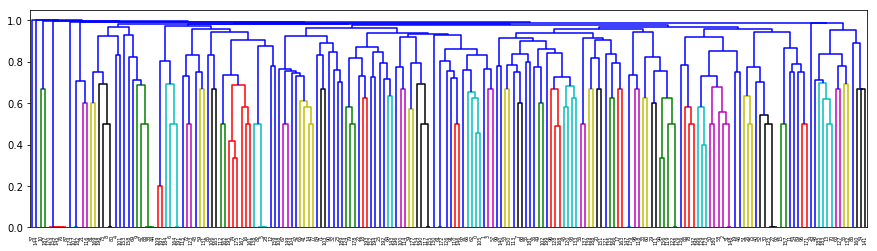

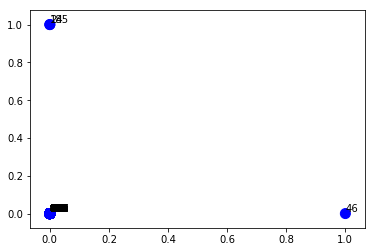

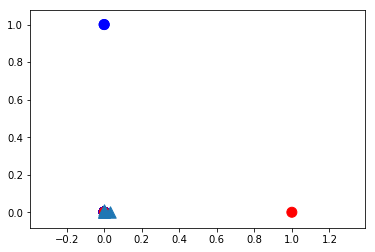

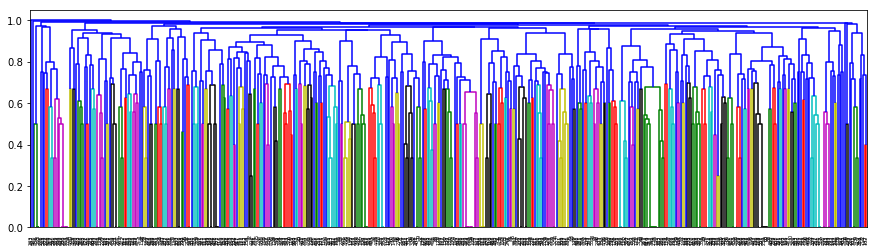

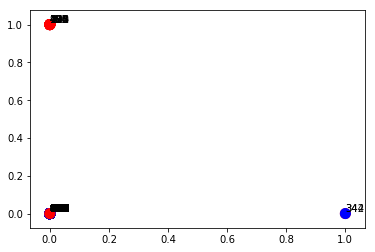

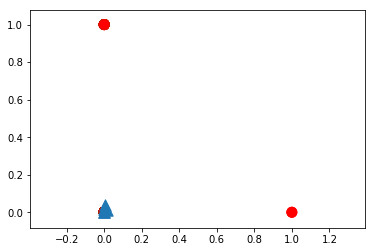

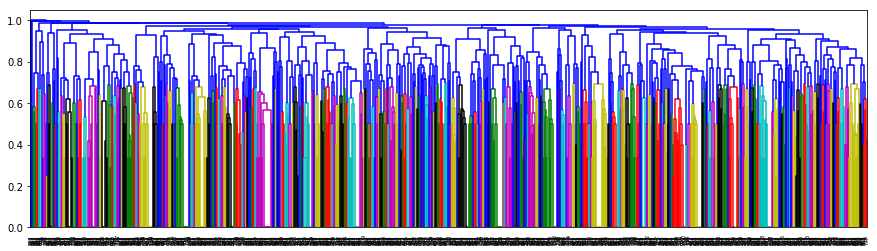

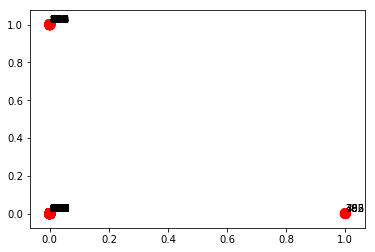

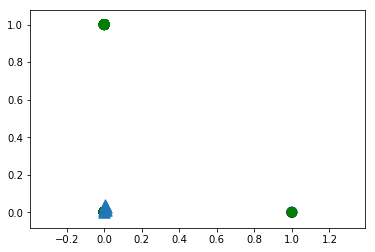

In [ ]:
iterlist = [200,500,1000,2000,5000]
for x in iterlist:
    itercluster(x)